# EDA — Coursera Dataset

## Goal & Scope

- Exploratory data analysis of scraped Coursera courses focusing on difficulty, enrolment, certificate type, and ratings.
- Aim: build a general understanding of course supply, demand (enrolment), and quality (weighted ratings).

# Key Findings
Dataset size: 891 courses.
#### Ratings
- Median rating ≈ 4.70/5
- Ratings by certificate type (mean weighted): Courses 4.688, Specializations 4.661, Professional Certificates 4.689

#### General
- Enrolment is highly concentrated (long tail with a few mega-courses at 1–3M+ students).
- Professional Certificates are scarce but have the highest average enrolment per course, suggesting strong credential/value pull, though overall demand share is still small because supply is tiny.
- Beginner content dominates the catalogue (>50%), but ratings are uniformly high (4.6–4.7+) across categories.
- Total enrolments ≈ 80.7M, with ~90.6k per course on average (median ~42k) — very right-skewed.


#### Certificate type Mix
- Courses: 582 ( 65.3% of all courses)
- Specializations: 297 ( 33.3%)
- Professional Certificates: 12 ( 1.3%)

#### Difficulty mix
- Beginner: 487 (54.7%)
- Intermediate: 198 (22.2%)
- Mixed: 187 (21.0%)
- Advanced: 19 (2.1%)


## Takeaways
- Courses skew generalist and entry-level, while advanced certificate types become more specialized and challenging which are less common on Coursera.
- Coursera offers a huge varierty of subjects which are excellent for introductory/entry level learning on any given topic
- If you want to study the best of the best:
  - Best Rated Organisation: Google - Spectrum Sharing (4.82 weighted rating)
  - Best Rated Course: Machine Learning by Stanford University (4.89 weighted rating)
- If you want to see how bad it can get:
  - Worst Rated Organisation: The State University of New York (4.47 weighted rating)
  - Worst Rated Course: How To Create a Website in a Weekend! (Project-Centered Course) by The State University of New York (3.93 weighted rating)



# Imports

In [199]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [200]:
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("siddharthm1698/coursera-course-dataset")

# print("Path to dataset files:", path)

## --- Helper functions ---

In [201]:
def object_to_int(x: str) -> int:
    if isinstance(x, str):
        x = x.lower().strip()
        if x.endswith("k"):
            return int(float(x[:-1]) * 1000)
        elif x.endswith("m"):
            return int(float(x[:-1]) * 1_000_000)
        else:
            return int(float(x))
        return x

In [202]:
def df_agg_by_col(df: pd.DataFrame, col: str) -> pd.DataFrame:
    return pd.DataFrame(df[col].value_counts()).reset_index()

In [203]:
def df_filter_by_top_n_col(df: pd.DataFrame, col: str, n: int) -> pd.DataFrame:
    df_col_count = pd.DataFrame(df[col].value_counts()).reset_index()
    df_count = df_col_count[[col, "count"]].nlargest(n, "count")
    return df[df[col].isin(df_count[col])]

In [204]:
def df_col_scaler(df: pd.DataFrame, col: str) -> np.ndarray:
    scaler = MinMaxScaler()
    model = scaler.fit(df[[col]])
    return model.transform(df[[col]])

# Data Preparation

In [205]:
df_raw = pd.read_csv(
    "/Users/guywinfield/PycharmProjects/Data/coursea_data.csv", index_col=0
)

In [206]:
df = df_raw.copy()

In [207]:
df.shape

(891, 6)

In [208]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [209]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

We need to clean the 'course_students_enrolled' field as it currently contains alphanumeric characters meaning we won't be able to convert this object into a numeric data type

In [210]:
df["course_students_enrolled"] = df["course_students_enrolled"].apply(object_to_int)

In [211]:
df["course_Certificate_type"].value_counts()

course_Certificate_type
COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: count, dtype: int64

In [212]:
df["course_difficulty"].value_counts()

course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

Let's change the 'course_difficulty' field to catgeorical, this will make ordering and comparing in charts much easier

In [213]:
df["course_difficulty"] = pd.Categorical(
    df["course_difficulty"],
    categories=["Beginner", "Intermediate", "Mixed", "Advanced"],
    ordered=True,
)

In [214]:
df.dtypes

course_title                  object
course_organization           object
course_Certificate_type       object
course_rating                float64
course_difficulty           category
course_students_enrolled       int64
dtype: object

In [215]:
df["course_organization"].value_counts()

course_organization
University of Pennsylvania                     59
University of Michigan                         41
Google Cloud                                   34
Johns Hopkins University                       28
Duke University                                28
                                               ..
Nanyang Technological University, Singapore     1
ScrumTrek                                       1
JetBrains                                       1
Tsinghua University                             1
Mail.Ru Group                                   1
Name: count, Length: 154, dtype: int64

<Axes: xlabel='course_students_enrolled', ylabel='Count'>

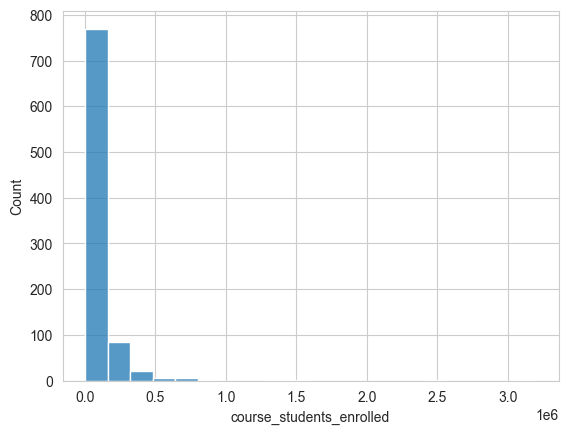

In [216]:
sns.histplot(df["course_students_enrolled"], bins=20)

In [217]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


Let's create some categories for course_rating so that we can compare how the best courses compare to the rest of the pack

In [218]:
df["course_rating_tier"] = pd.cut(
    df["course_rating"],
    bins=[0, 4.6, 4.7, 4.8, float("Inf")],
    labels=["Tier 4", "Tier 3", "Tier 2", "Tier 1"],
    right=False,
)

In [219]:
df.groupby("course_rating_tier").describe().reset_index()

course_rating_tier course_rating                                         \
                             count      mean           std  min  25%  50%   
0             Tier 4         146.0  4.404110  1.652070e-01  3.3  4.4  4.5   
1             Tier 3         168.0  4.600000  1.781667e-15  4.6  4.6  4.6   
2             Tier 2         251.0  4.700000  8.899530e-16  4.7  4.7  4.7   
3             Tier 1         326.0  4.822086  4.300202e-02  4.8  4.8  4.8   

            course_students_enrolled                                        \
   75%  max                    count           mean            std     min   
0  4.5  4.5                    146.0   70861.643836  113325.497792  1800.0   
1  4.6  4.6                    168.0   93947.619048  120994.905100  1600.0   
2  4.7  4.7                    251.0   81971.713147   96194.615840  1700.0   
3  4.8  5.0                    326.0  104226.993865  264292.452481  1500.0   

                                          
       25%      50%       75%        max  
0  13000.0  35000.0   79500.0   830000.0  
1  16750.0  42500.0  130000.0   740000.0  
2  21000.0  43000.0  110000.0   610000.0  
3  17000.0  43000.0   89000.0  3200000.0

We have duplicate course titles in the data,there are very few duplicates and they are obviously correct records therefore we won't remove anything however we will have to be cautious for whenever we decide to aggregate at a course title level (The data is already 1 course per row).

In [220]:
df[df["course_title"].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000,Tier 1
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000,Tier 1
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000,Tier 3
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000,Tier 1
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000,Tier 1
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000,Tier 2


<Axes: ylabel='course_students_enrolled'>

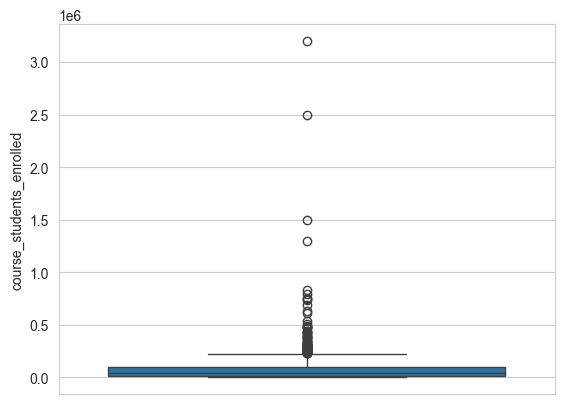

In [221]:
sns.boxplot(y=df["course_students_enrolled"])

<Axes: xlabel='course_difficulty', ylabel='course_students_enrolled'>

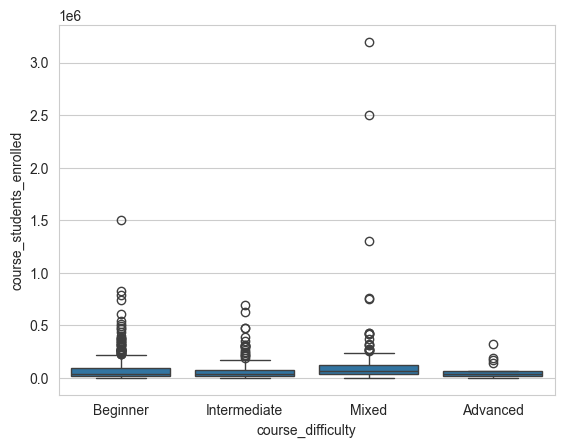

In [222]:
sns.boxplot(x=df["course_difficulty"], y=df["course_students_enrolled"])

Based on the boxplots we can see a number of outliers exceeding the box whisker however they seem reasonably grouped. let's have a look at some larger outliers i.e enrollment which exceeds 1,000,000 students

There doesn't appear to be any good reason why we should exclude these records, they are just very popular courses.

In [223]:
df[df["course_students_enrolled"] > 1000000].sort_values(
    "course_students_enrolled", ascending=False
)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000,Tier 1
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000,Tier 1
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000,Tier 1
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000,Tier 1


In [224]:
df.loc[df["course_title"] == "Machine Learning"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000,Tier 3
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000,Tier 1


### Scaling

It might be helpful when plotting and comapring distributions to have some scaled fields

In [225]:
df["course_students_enrolled_scaled"] = df_col_scaler(df, "course_students_enrolled")
df["course_rating_scaled"] = df_col_scaler(df, "course_rating")

In [226]:
df.head(2)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier,course_students_enrolled_scaled,course_rating_scaled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,Tier 2,0.001188,0.823529
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,Tier 2,0.004846,0.823529


<Axes: xlabel='course_students_enrolled_scaled', ylabel='Count'>

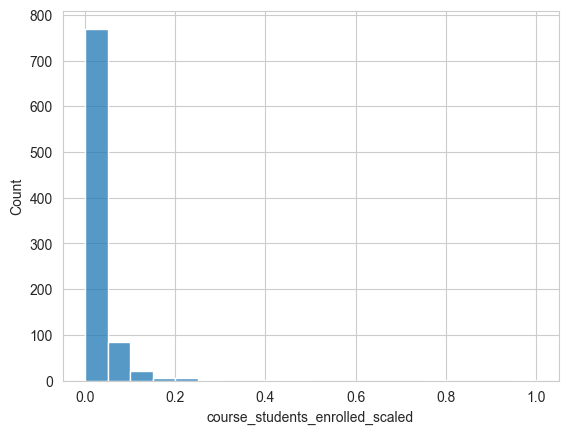

In [227]:
sns.histplot(df["course_students_enrolled_scaled"], bins=20)

<Axes: xlabel='course_rating', ylabel='Count'>

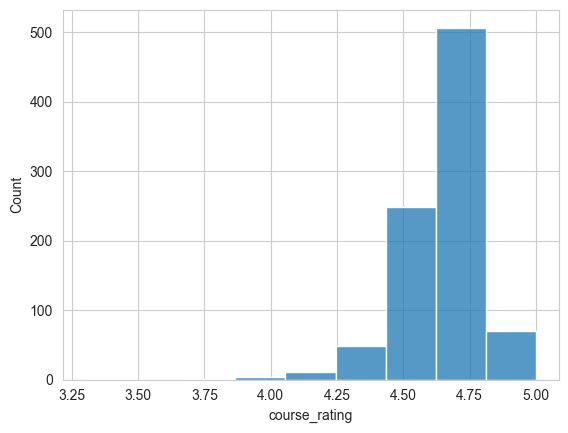

In [228]:
sns.histplot(df["course_rating"], bins=9)

### Creating Weighted Course Rating

We want to add an additional field which proportionately represents a course rating. For instance, we should add more weight/credibility to a course with a 4.8 rating with 10,000 students enrolled more so than a 4.8 rated course with 10 students enrolled.

Since `course_students_enrolled` is positively skewed, we want a higher m (e.g. 70–80th percentile of enrollments) to prevent tiny courses with 5 ratings from outranking massive ones with thousands.

<Axes: xlabel='course_students_enrolled', ylabel='Count'>

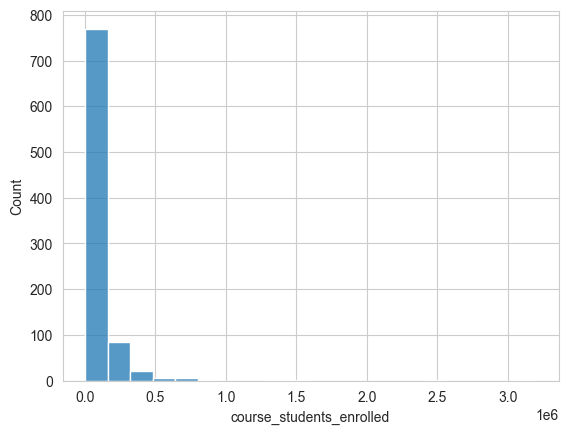

In [229]:
sns.histplot(df["course_students_enrolled"], bins=20)

In [230]:
print(
    f"mean: {df['course_students_enrolled'].mean():.2f}, median:,{df['course_students_enrolled'].median():.2f}"
)

mean: 90552.08, median:,42000.00


In [231]:
C = df["course_rating"].mean()
m = df["course_students_enrolled"].quantile(0.80)
df["weighted_course_rating"] = (
    df["course_students_enrolled"] / (df["course_students_enrolled"] + m)
) * df["course_rating"] + (m / (df["course_students_enrolled"] + m)) * C

In [232]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier,course_students_enrolled_scaled,course_rating_scaled,weighted_course_rating
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,Tier 2,0.001188,0.823529,4.678288
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,Tier 2,0.004846,0.823529,4.680142
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000,Tier 4,0.040175,0.705882,4.585118
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000,Tier 2,0.027982,0.823529,4.687106
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000,Tier 1,0.099578,0.882353,4.766544


In [233]:
df["weighted_course_rating_tier"] = pd.cut(
    df["weighted_course_rating"],
    bins=[0, 4.6, 4.7, 4.8, float("Inf")],
    labels=["Tier 4", "Tier 3", "Tier 2", "Tier 1"],
    right=False,
)

<Axes: xlabel='weighted_course_rating', ylabel='Count'>

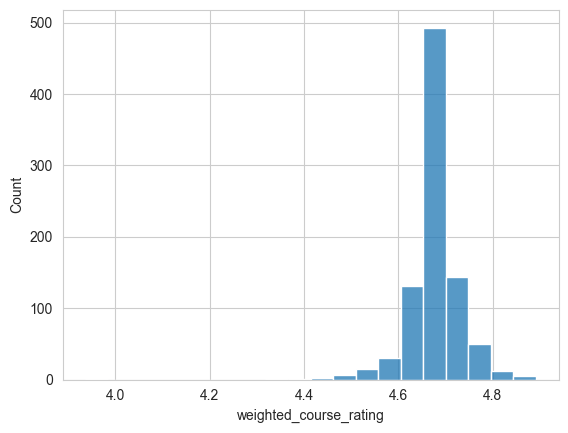

In [234]:
sns.histplot(x=df["weighted_course_rating"], bins=20)

# Exploratory Data Analysis

### What's the best Course in town?

Based on our weighted course ratings we can see that Stanford University's Machine Learning course is incredibly popular and highly rated.

In [235]:
df[
    [
        "course_title",
        "course_organization",
        "course_students_enrolled",
        "weighted_course_rating",
        "course_rating",
    ]
].sort_values("weighted_course_rating", ascending=False).head(10)

,course_title,course_organization,course_students_enrolled,weighted_course_rating,course_rating
6,Machine Learning,Stanford University,3200000,4.891952,4.9
2,The Science of Well-Being,Yale University,2500000,4.889801,4.9
62,Neural Networks and Deep Learning,deeplearning.ai,630000,4.864373,4.9
111,Python Data Structures,University of Michigan,420000,4.850518,4.9
113,First Step Korean,Yonsei University,400000,4.848614,4.9
123,Improving Deep Neural Networks: Hyperparameter...,deeplearning.ai,270000,4.831486,4.9
29,Introduction to Psychology,Yale University,270000,4.831486,4.9
11,Excel Skills for Business,Macquarie University,240000,4.825776,4.9
207,Convolutional Neural Networks,deeplearning.ai,240000,4.825776,4.9
21,COVID-19 Contact Tracing,Johns Hopkins University,220000,4.821410,4.9


## And the best Organisation?

In [236]:
df_best_orgs = (
    df.groupby(["course_organization"])
    .agg(
        ratings_weighted_mean=("weighted_course_rating", "mean"),
        course_count=("course_difficulty", "size"),
        total_enrollment=("course_students_enrolled", "sum"),
        avg_enrollment=("course_students_enrolled", "mean"),
    )
    .reset_index()
)

In [237]:
df_best_orgs.sort_values(by="ratings_weighted_mean", ascending=False)

,course_organization,ratings_weighted_mean,course_count,total_enrollment,avg_enrollment
33,Google - Spectrum Sharing,4.819029,1,210000,210000.000000
36,Hebrew University of Jerusalem,4.775718,1,95000,95000.000000
58,McMaster University,4.757941,1,230000,230000.000000
151,École Polytechnique,4.752514,1,190000,190000.000000
95,The University of Chicago,4.749975,2,168000,84000.000000
...,...,...,...,...,...
31,"Goldsmiths, University of London",4.619341,4,259000,64750.000000
103,Tsinghua University,4.618869,1,22000,22000.000000
43,Icahn School of Medicine at Mount Sinai,4.598092,1,48000,48000.000000
117,University System of Georgia,4.593480,3,173000,57666.666667


By taking the average of course weighted ratings, "Google - Spectrum Sharing" seems to be the best provider overall.

In [238]:
df[df["course_organization"] == "Google - Spectrum Sharing"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier,course_students_enrolled_scaled,course_rating_scaled,weighted_course_rating,weighted_course_rating_tier
106,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,COURSE,4.9,Mixed,210000,Tier 1,0.065187,0.941176,4.819029,Tier 1


### What about the worst Course?

In [239]:
df[
    [
        "course_title",
        "course_organization",
        "course_students_enrolled",
        "weighted_course_rating",
        "course_rating",
    ]
].sort_values("weighted_course_rating", ascending=True).head(5)

,course_title,course_organization,course_students_enrolled,weighted_course_rating,course_rating
767,How To Create a Website in a Weekend! (Project...,The State University of New York,140000,3.935690,3.3
550,Mastering Data Analysis in Excel,Duke University,280000,4.343199,4.2
779,iOS App Development with Swift,University of Toronto,76000,4.375916,3.9
821,Cybersecurity and Its Ten Domains,University System of Georgia,140000,4.420306,4.2
44,Career Success,"University of California, Irvine",790000,4.436571,4.4


In [240]:
df["course_title"].loc[767]

'How To Create a Website in a Weekend! (Project-Centered Course)'

### And the worst Organisation?

In [241]:
df_best_orgs.sort_values(by="ratings_weighted_mean", ascending=True).head(5)

,course_organization,ratings_weighted_mean,course_count,total_enrollment,avg_enrollment
94,The State University of New York,4.479029,4,221000,55250.000000
117,University System of Georgia,4.593480,3,173000,57666.666667
43,Icahn School of Medicine at Mount Sinai,4.598092,1,48000,48000.000000
103,Tsinghua University,4.618869,1,22000,22000.000000
31,"Goldsmiths, University of London",4.619341,4,259000,64750.000000


In [242]:
df[df["course_organization"] == "The State University of New York"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier,course_students_enrolled_scaled,course_rating_scaled,weighted_course_rating,weighted_course_rating_tier
767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000,Tier 4,0.043302,0.000000,3.935690,Tier 4
701,International Cyber Conflicts,The State University of New York,COURSE,4.4,Mixed,25000,Tier 4,0.007347,0.647059,4.629514,Tier 3
692,Practical Time Series Analysis,The State University of New York,COURSE,4.6,Intermediate,39000,Tier 3,0.011724,0.764706,4.658361,Tier 3
515,Solar Energy Basics,The State University of New York,COURSE,4.8,Beginner,17000,Tier 1,0.004846,0.882353,4.692551,Tier 3


3.3 rating eeessssh! There's no obvious sign why these courses might be rated so poorly, with extra data we could dig a little deeper

### How are courses split across types and difficulty?

In [243]:
df_cert_type_num = df_agg_by_col(df, "course_Certificate_type")
df_cert_type_num = df_cert_type_num.set_index("course_Certificate_type")
df_cert_type_num["% Share"] = round(
    df_cert_type_num["count"] / df_cert_type_num["count"].sum() * 100, 1
)
df_cert_type_num

,count,% Share
course_Certificate_type,,
COURSE,582,65.3
SPECIALIZATION,297,33.3
PROFESSIONAL CERTIFICATE,12,1.3


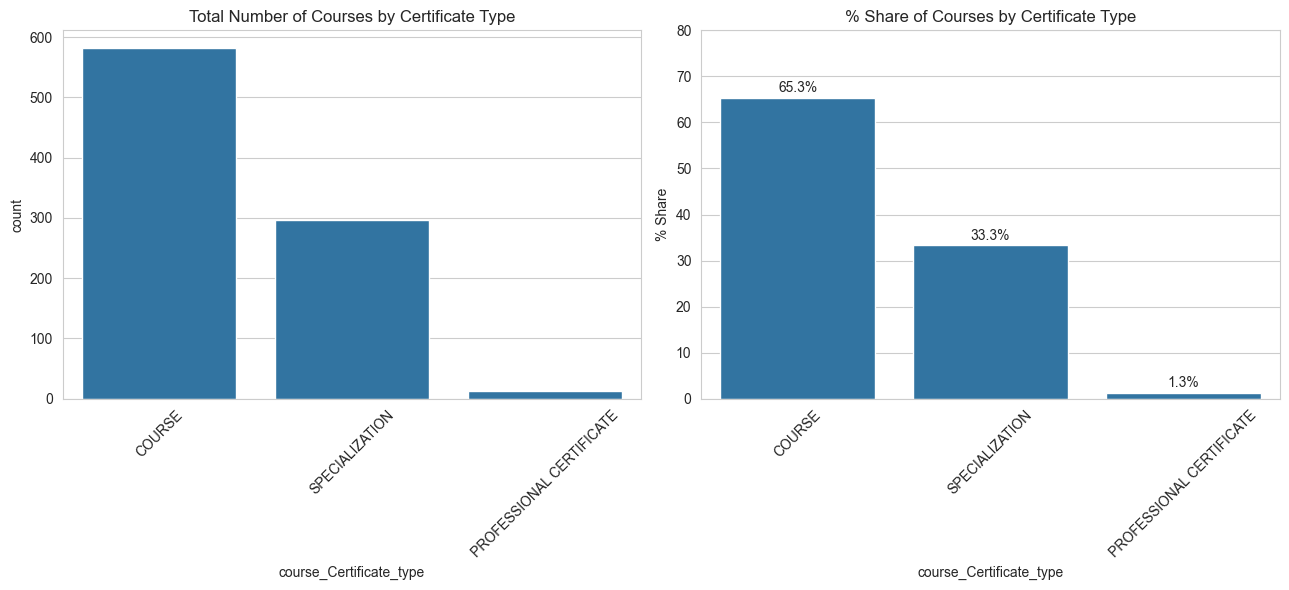

In [244]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

# 1)
sns.barplot(x=df_cert_type_num.index, y=df_cert_type_num["count"], ax=ax[0])
ax[0].set_title("Total Number of Courses by Certificate Type")
ax[0].tick_params(axis="x", rotation=45)

# 2)
sns.barplot(x=df_cert_type_num.index, y=df_cert_type_num["% Share"], ax=ax[1])
ax[1].set_title("% Share of Courses by Certificate Type")
ax[1].tick_params(axis="x", rotation=45)
ax[1].set_ylim(0, 80)

# If '% Share' is a proportion in [0,1]:
for container in ax[1].containers:
    labels = [f"{bar.get_height():.1f}%" for bar in container]
    ax[1].bar_label(container, labels=labels, padding=2)

plt.tight_layout()
plt.show()

65% of all Certificate types are Courses, 33% are specialisations and only 1.3% provie a professional certificate. We could theorise that Courses are more general purpose and beginner friendly where as the certificate type progresses the most specialised / difficult they become.

In [245]:
df_cert_type_num = df_agg_by_col(df, "course_difficulty")
df_cert_type_num = df_cert_type_num.set_index("course_difficulty")
df_cert_type_num["% Share"] = round(
    df_cert_type_num["count"] / df_cert_type_num["count"].sum() * 100, 1
)
df_cert_type_num

,count,% Share
course_difficulty,,
Beginner,487,54.7
Intermediate,198,22.2
Mixed,187,21.0
Advanced,19,2.1


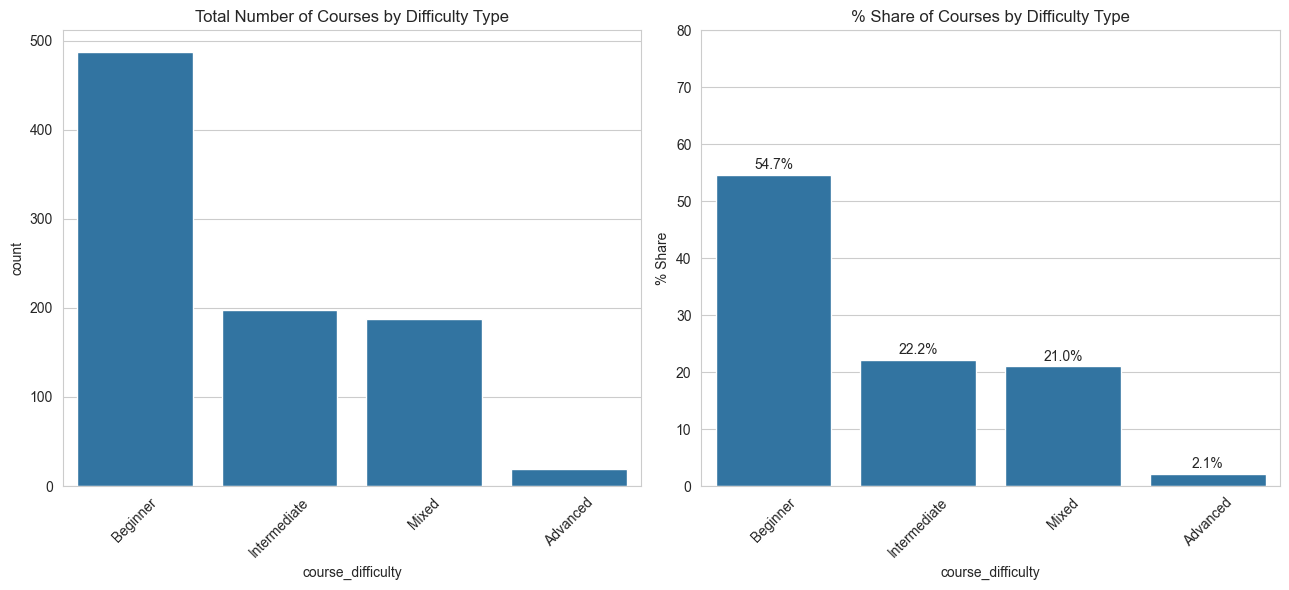

In [246]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

# 1)
sns.barplot(x=df_cert_type_num.index, y=df_cert_type_num["count"], ax=ax[0])
ax[0].set_title("Total Number of Courses by Difficulty Type")
ax[0].tick_params(axis="x", rotation=45)

# 2)
sns.barplot(x=df_cert_type_num.index, y=df_cert_type_num["% Share"], ax=ax[1])
ax[1].set_title("% Share of Courses by Difficulty Type")
ax[1].tick_params(axis="x", rotation=45)
ax[1].set_ylim(0, 80)

# If '% Share' is a proportion in [0,1]:
for container in ax[1].containers:
    labels = [f"{bar.get_height():.1f}%" for bar in container]
    ax[1].bar_label(container, labels=labels, padding=2)

plt.tight_layout()
plt.show()

The majority (54%) of courses on Coursera are for beginners, the more challenging the course becomes the less courses there are available (See advanced representing 2.1%)

This suggests Coursera might be a good place to get introductory knowledge on a subject but for deeper learning other platforms might be more suitable

### Do Organisations who provide more courses provide "better" courses?

In [247]:
df_course_num = df_agg_by_col(df, "course_organization")
df_course_num.describe()

,count
count,154.000000
mean,5.785714
std,7.986070
min,1.000000
25%,1.000000
50%,3.000000
75%,6.750000
max,59.000000


Text(0, 0.5, 'Volume')

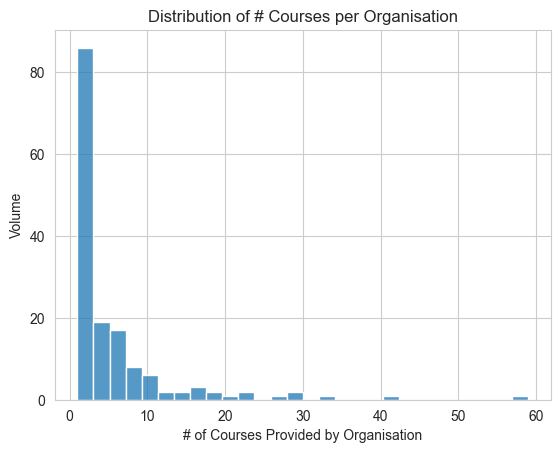

In [248]:
s = sns.histplot(x=df_course_num["count"])
s.set_title("Distribution of # Courses per Organisation")
s.set_xlabel(xlabel="# of Courses Provided by Organisation")
s.set_ylabel(ylabel="Volume")

Is bigger always better? Looking at the distribution of the number of courses Organisations provide we can see it skews haevily around 1. But we have a number of outliers that provide 10s of different courses. Are these organisations providing better courses or just more of them?

In [249]:
df_course_num[df_course_num["count"] > df_course_num["count"].quantile(0.75)]

,course_organization,count
0,University of Pennsylvania,59
1,University of Michigan,41
2,Google Cloud,34
3,Johns Hopkins University,28
4,Duke University,28
5,"University of California, Irvine",27
6,IBM,22
7,University of Illinois at Urbana-Champaign,22
8,"University of California, Davis",21
9,University of Colorado Boulder,19


Let's take a look at the top 10 Organisations based on the number of courses they provide.

In [250]:
n = 10
course_agg = df_agg_by_col(df, "course_organization")
top_10 = course_agg[["course_organization", "count"]].nlargest(n, "count")

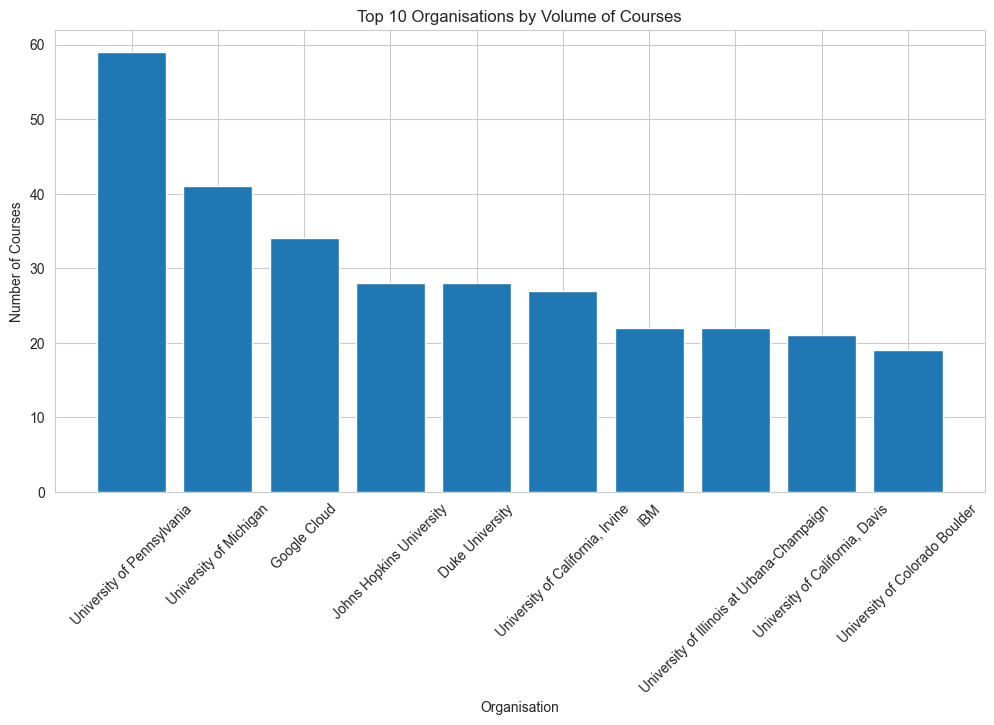

In [251]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

ax.bar(top_10["course_organization"], top_10["count"])
ax.set_title("Top 10 Organisations by Volume of Courses")
ax.set_xlabel("Organisation")
plt.xticks(rotation=45)
ax.set_ylabel("Number of Courses")

plt.show()

In [264]:
df.head(2)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier,course_students_enrolled_scaled,course_rating_scaled,weighted_course_rating,weighted_course_rating_tier
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,Tier 2,0.001188,0.823529,4.678288,Tier 3
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,Tier 2,0.004846,0.823529,4.680142,Tier 3


### Is there much of a difference between the best rated quartile of courses vs the bottom quartile?

In [266]:
df_best_vs_worst = df[df['weighted_course_rating_tier'].isin(['Tier 1','Tier 4'])]
df_best_vs_worst.head(2)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_tier,course_students_enrolled_scaled,course_rating_scaled,weighted_course_rating,weighted_course_rating_tier
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000,Tier 4,0.040175,0.705882,4.585118,Tier 4
157,Advanced Data Science with IBM,IBM,SPECIALIZATION,4.4,Advanced,320000,Tier 4,0.099578,0.647059,4.475635,Tier 4


<Axes: xlabel='course_difficulty', ylabel='weighted_course_rating'>

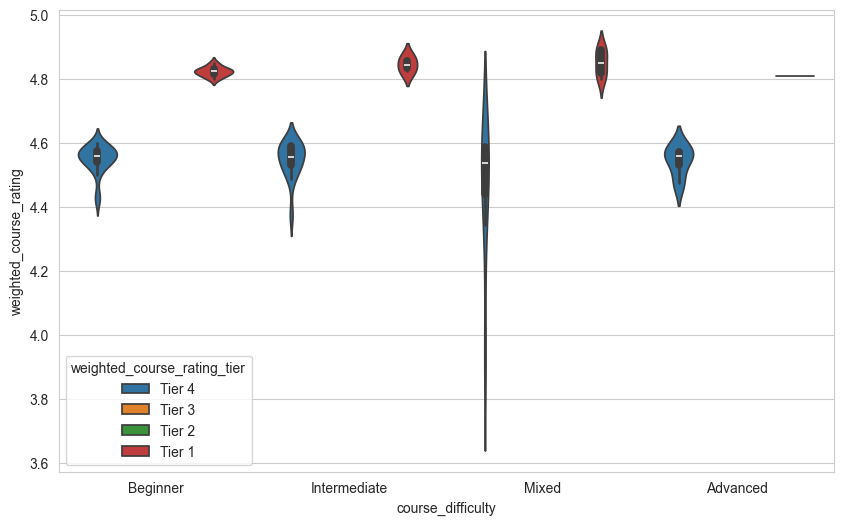

In [271]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(
    data=df_best_vs_worst,
    x="course_difficulty",
    y="weighted_course_rating",
    hue="weighted_course_rating_tier",
)
#ax.set_ylim(4.2, 4.9)


<Axes: xlabel='course_Certificate_type', ylabel='course_students_enrolled'>

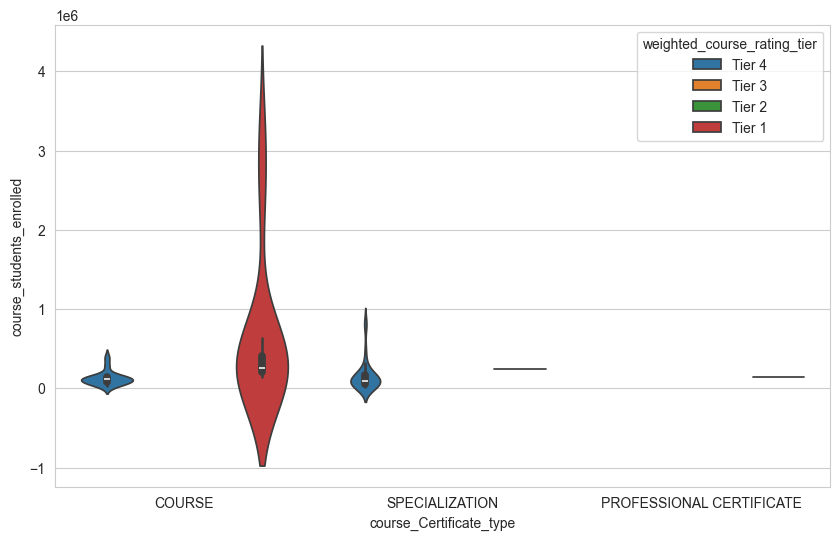

In [272]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(
    data=df_best_vs_worst,
    x="course_Certificate_type",
    y="course_students_enrolled",
    hue="weighted_course_rating_tier",
)
#ax.set_ylim(4.2, 4.9)


### Is an Organisation having lots courses a sign of better course quality?

Overall Median Weighted Course Rating:,4.683
Top 10 Median Weighted Course Rating: 4.681


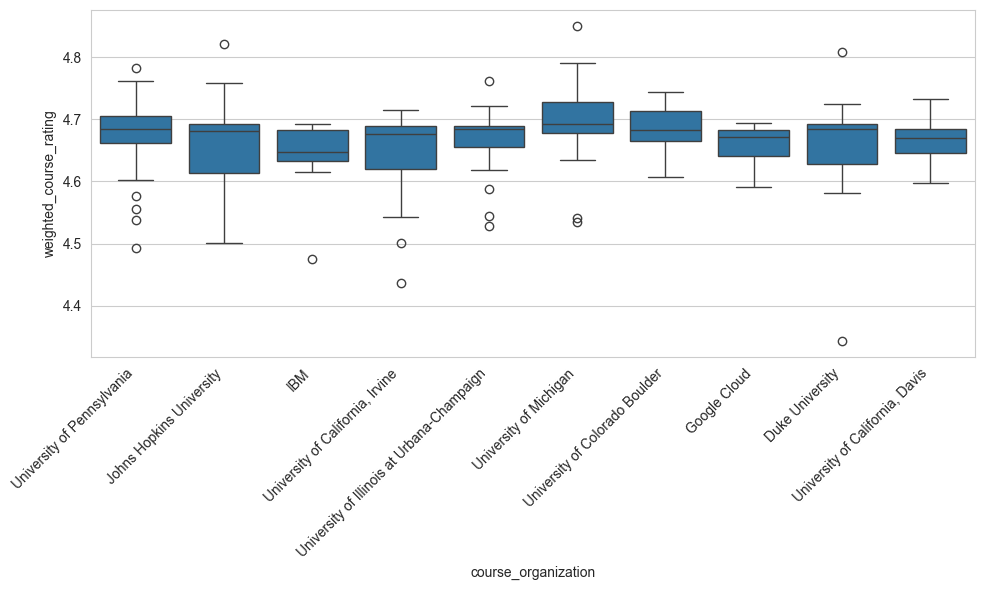

In [253]:
# Is having courses a sign of better course quality?
n = 10
top_n = df_filter_by_top_n_col(df, "course_organization", n)

fig, ax = plt.subplots(figsize=(10, 6))  # wider figure (14 inches wide, 6 high)
sns.boxplot(data=top_n, x="course_organization", y="weighted_course_rating", ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
print(
    f"Overall Median Weighted Course Rating:,{df['weighted_course_rating'].median():.3f}"
)
print(
    f"Top 10 Median Weighted Course Rating: {top_n['weighted_course_rating'].median():.3f}"
)

plt.show()

Based on the 10 organisations with the most courses, the median weighted ratings don't differ much from the overall picture. Let's dig a little deeper to see if there are any differences.

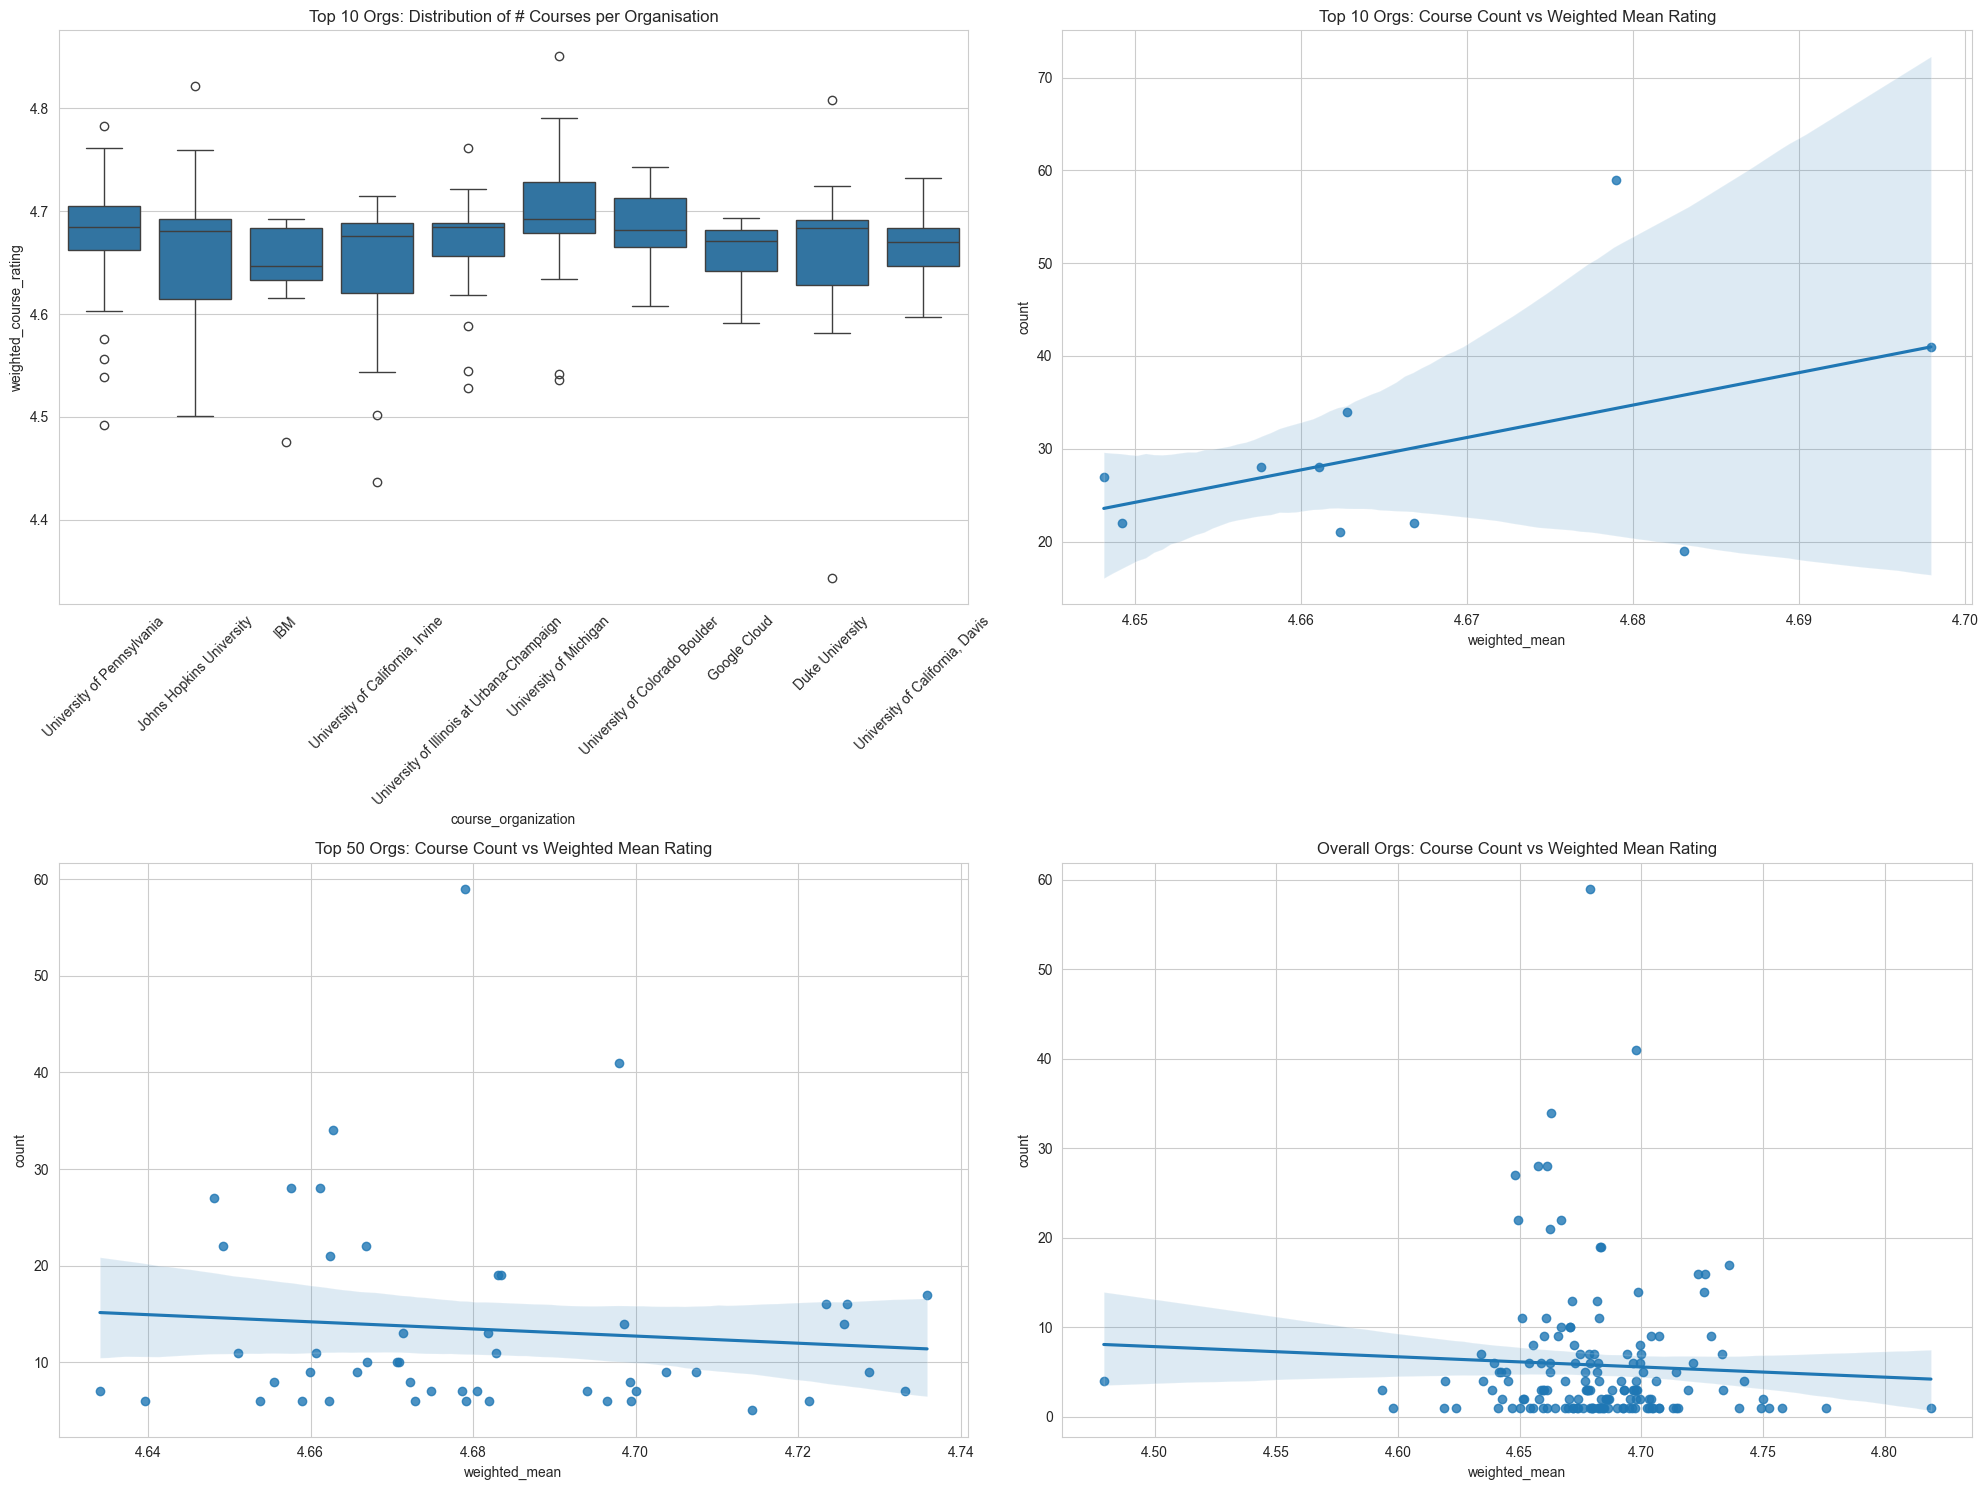

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

n = 10
top_10 = df_filter_by_top_n_col(df, "course_organization", n)

# 1) Boxplot in the first cell
sns.boxplot(
    data=top_10, x="course_organization", y="weighted_course_rating", ax=ax[0, 0]
)
ax[0, 0].set_title(f"Top {10} Orgs: Distribution of # Courses per Organisation")
ax[0, 0].tick_params(axis="x", rotation=45, labelrotation=45)

# 2) Group and plot regression in the second cell
top_10_grouped = top_10.groupby("course_organization", as_index=False).agg(
    weighted_mean=("weighted_course_rating", "mean"),
    count=("course_organization", "size"),
)

sns.regplot(data=top_10_grouped, x="weighted_mean", y="count", ax=ax[0, 1])
ax[0, 1].set_title(f"Top {10} Orgs: Course Count vs Weighted Mean Rating")


n = 50
top_50 = df_filter_by_top_n_col(df, "course_organization", n)

# 3) Group and plot regression in the second cell
top_50_grouped = top_50.groupby("course_organization", as_index=False).agg(
    weighted_mean=("weighted_course_rating", "mean"),
    count=("course_organization", "size"),
)

sns.regplot(data=top_50_grouped, x="weighted_mean", y="count", ax=ax[1, 0])
ax[1, 0].set_title(f"Top {n} Orgs: Course Count vs Weighted Mean Rating")


# 4) Group and plot regression in the second cell
all_grouped = df.groupby("course_organization", as_index=False).agg(
    weighted_mean=("weighted_course_rating", "mean"),
    count=("course_organization", "size"),
)

sns.regplot(data=all_grouped, x="weighted_mean", y="count", ax=ax[1, 1])
ax[1, 1].set_title(f"Overall Orgs: Course Count vs Weighted Mean Rating")


plt.tight_layout()

In [255]:
test_10 = top_10_grouped[["weighted_mean", "count"]].corr()
test_10["sample"] = 10

test_50 = top_50_grouped[["weighted_mean", "count"]].corr()
test_50["sample"] = 50

test_all = all_grouped[["weighted_mean", "count"]].corr()
test_all["sample"] = len(course_agg)

test_total = pd.concat(
    [test_10[["weighted_mean", "count", "sample"]], test_50, test_all],
    ignore_index=True,
)

The correlations would suggest that looking just among the top 10 most orgs there is a correlation between the # courses provided and their quality. However this doesn't extraploate outside of the top 10.

With more data we could dig deeper to see if there are any differences between the top 10 and the other organisations. Maybe they have well established training processes and learning material which smaller organisations (Ex: 1 course only) don't have.

### What Type of Course do people enrol to the most?

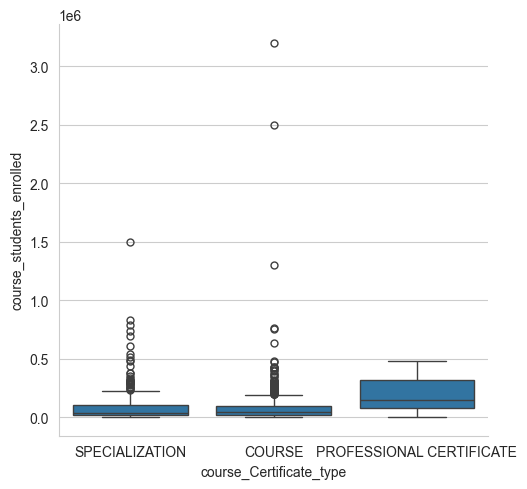

In [256]:
sns.catplot(df, x="course_Certificate_type", y="course_students_enrolled", kind="box")

Based on this Barchart 'Professional Certificate' based courses have double the enrolment of Specialization and Course types. Although there are fewer 'Professional Certificate' based courses they are very capable of driving enrollment.

How does this match up with the available courses? If there's high demand for Professional Certificates should we expect there to be a proportionate amount of Professional Certificate based courses?

In [257]:
df_courses = (
    df.groupby(["course_difficulty", "course_Certificate_type"])
    .agg(
        ratings_weighted_mean=("weighted_course_rating", "mean"),
        course_count=("course_difficulty", "size"),
        total_enrollment=("course_students_enrolled", "sum"),
        avg_enrollment=("course_students_enrolled", "mean"),
    )
    .reset_index()
)

df_courses["Course Count % Share"] = (
    df_courses["course_count"] / df_courses["course_count"].sum()
)
df_courses["avg_enrollment"] = round(df_courses["avg_enrollment"], 0)

df_courses

,course_difficulty,course_Certificate_type,ratings_weighted_mean,course_count,total_enrollment,avg_enrollment,Course Count % Share
0,Beginner,COURSE,4.688130,282,19411500,68835.0,0.316498
1,Beginner,PROFESSIONAL CERTIFICATE,4.699386,9,1718400,190933.0,0.010101
2,Beginner,SPECIALIZATION,4.664608,196,18791900,95877.0,0.219978
3,Intermediate,COURSE,4.682296,104,6323700,60805.0,0.116723
4,Intermediate,PROFESSIONAL CERTIFICATE,4.656009,3,570000,190000.0,0.003367
5,Intermediate,SPECIALIZATION,4.658288,91,7612600,83655.0,0.102132
6,Mixed,COURSE,4.689052,187,24989400,133633.0,0.209877
7,Mixed,PROFESSIONAL CERTIFICATE,NaN,0,0,NaN,0.000000
8,Mixed,SPECIALIZATION,NaN,0,0,NaN,0.000000
9,Advanced,COURSE,4.696717,9,406700,45189.0,0.010101


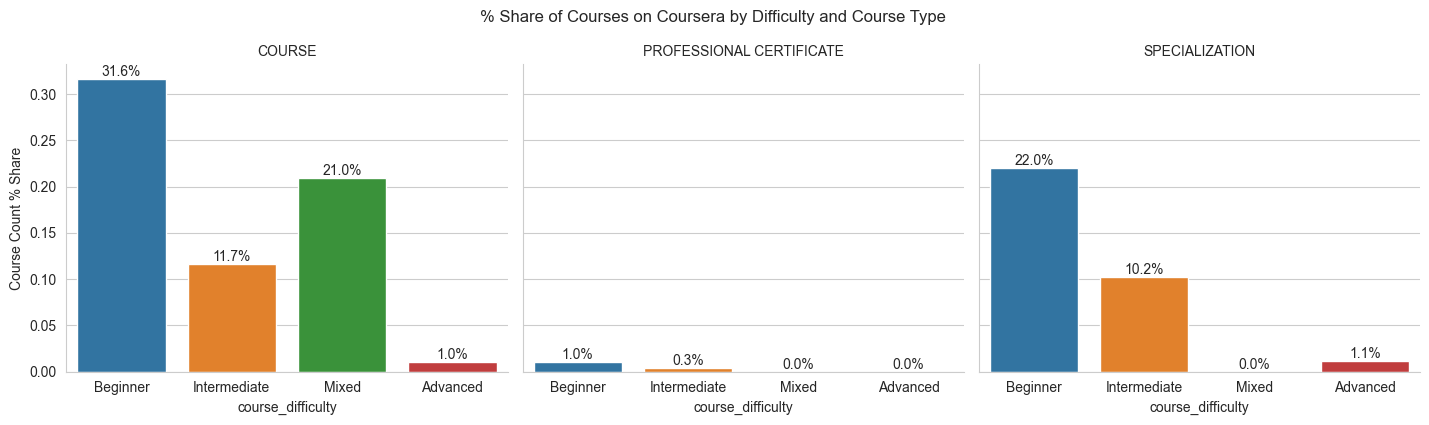

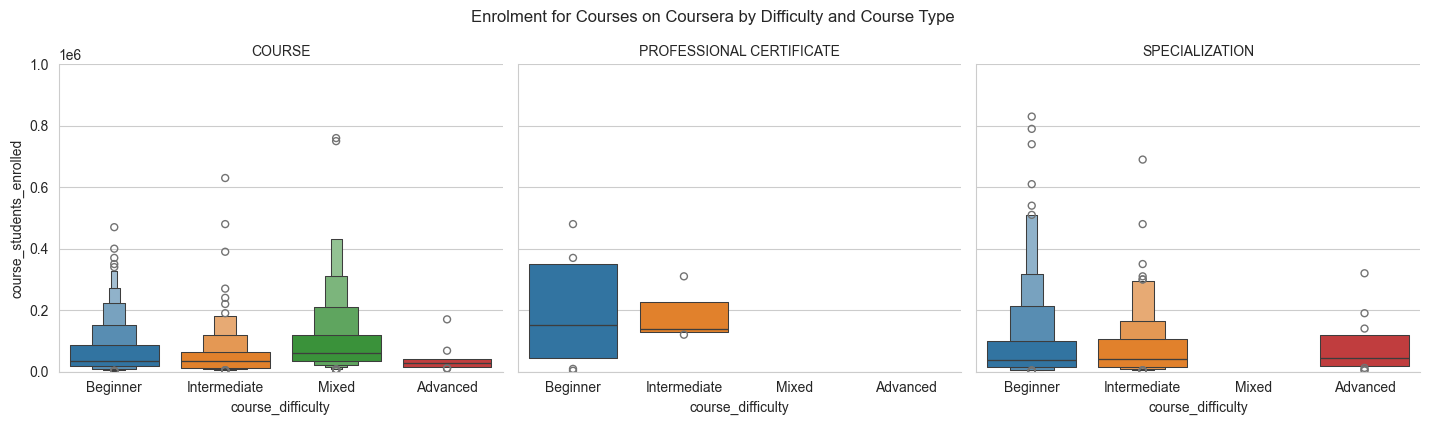

In [258]:
# Define the order once
cert_order = df_courses["course_Certificate_type"].unique()

# 1) Faceted % Share
g1 = sns.catplot(
    data=df_courses,
    x="course_difficulty",
    y="Course Count % Share",
    col="course_Certificate_type",
    col_order=cert_order,
    kind="bar",
    height=4,
    aspect=1.2,
    hue="course_difficulty",
)

for ax in g1.axes.flat:
    for c in ax.containers:  # each set of bars
        # Multiply heights by 100 and format as percent
        labels = [f"{v.get_height()*100:.1f}%" for v in c]
        ax.bar_label(c, labels=labels, label_type="edge")

g1.set_titles(col_template="{col_name}")
g1.fig.suptitle("% Share of Courses on Coursera by Difficulty and Course Type ", y=1.05)

# 2) Faceted enrolled
g2 = sns.catplot(
    data=df,
    x="course_difficulty",
    y="course_students_enrolled",
    col="course_Certificate_type",
    col_order=cert_order,
    height=4,
    aspect=1.2,
    hue="course_difficulty",
    kind="boxen",
)
g2.set_titles(col_template="{col_name}")
g2.fig.suptitle(
    "Enrolment for Courses on Coursera by Difficulty and Course Type ", y=1.05
)
g2.set(ylim=(0, 1_000_000))

Professional Certificates have high enrollments but only represent 1.3% of all courses in the data. On the other hand, we can see a massive supply of 'Beginner - Courses' compared to the student enrolment distribution.

Given the high enrolment for Professional Certficates should we expect higher ratings?

(4.2, 4.9)

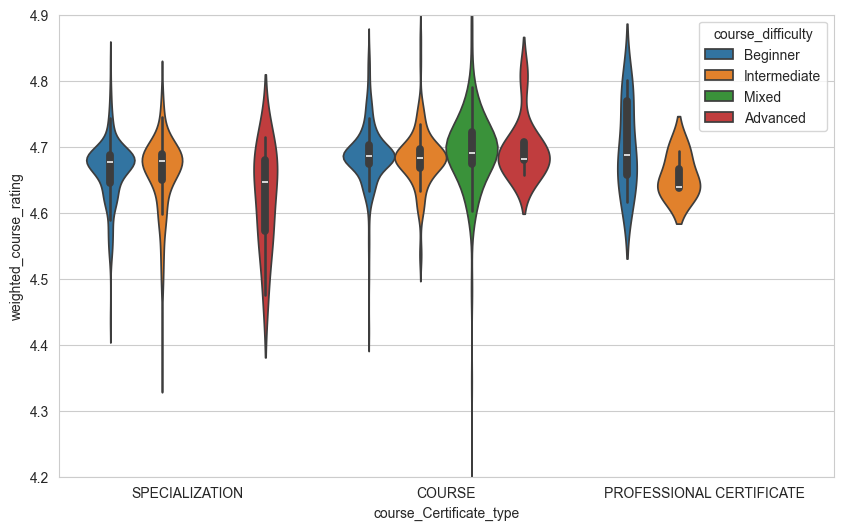

In [259]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(
    data=df,
    x="course_Certificate_type",
    y="weighted_course_rating",
    hue="course_difficulty",
)
ax.set_ylim(4.2, 4.9)

Not by the looks of it! Weighted Course Ratings are in line with other Certificate Types and difficulty levels. In fact Intermediate Professional Certificates on average have a lower course rating!

## Is there any preference for Courses based on Difficulty? Do easier courses get more enrolment?

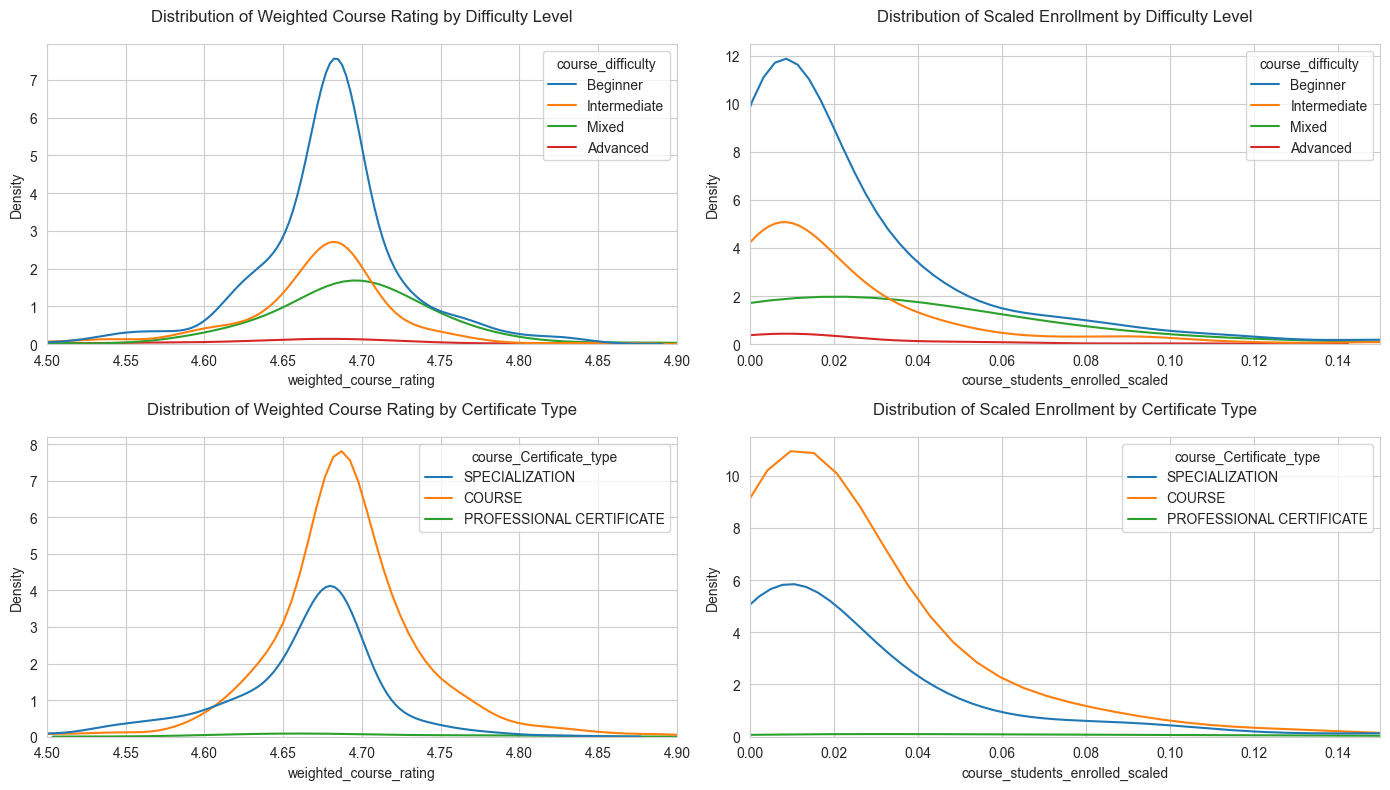

In [260]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))

# 1)
sns.kdeplot(data=df, x="weighted_course_rating", hue="course_difficulty", ax=ax[0, 0])
ax[0, 0].set_xlim(4.5, 4.9)
ax[0, 0].set_title("Distribution of Weighted Course Rating by Difficulty Level", y=1.05)

# 2)
sns.kdeplot(
    data=df, x="course_students_enrolled_scaled", hue="course_difficulty", ax=ax[0, 1]
)
ax[0, 1].set_xlim(0, 0.15)
ax[0, 1].set_title("Distribution of Scaled Enrollment by Difficulty Level", y=1.05)

# 3)
sns.kdeplot(
    data=df, x="weighted_course_rating", hue="course_Certificate_type", ax=ax[1, 0]
)
ax[1, 0].set_xlim(4.5, 4.9)
ax[1, 0].set_title("Distribution of Weighted Course Rating by Certificate Type", y=1.05)

# 4)
sns.kdeplot(
    data=df,
    x="course_students_enrolled_scaled",
    hue="course_Certificate_type",
    ax=ax[1, 1],
)
ax[1, 1].set_xlim(0, 0.15)
ax[1, 1].set_title("Distribution of Scaled Enrollment by Certificate Type", y=1.05)


plt.tight_layout()

All course types seem to follow simialr distributions around the weighted course ratings peaking around 4.65 however 'Mixed' course difficultly types tend to peak around 4.7. Maybe students feel a greater sense of progression and learning with a course with progressive levels of difficulty

### Can we see a relationship between enrollment and rating?

<Axes: xlabel='course_students_enrolled', ylabel='weighted_course_rating'>

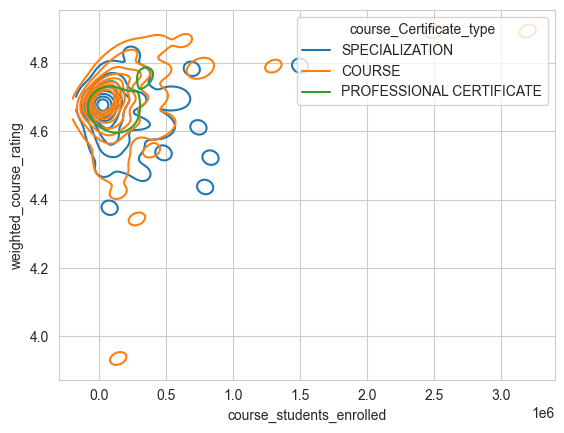

In [261]:
sns.kdeplot(
    x=df["course_students_enrolled"],
    y=df["weighted_course_rating"],
    hue=df["course_Certificate_type"],
)

<Axes: xlabel='course_students_enrolled', ylabel='weighted_course_rating'>

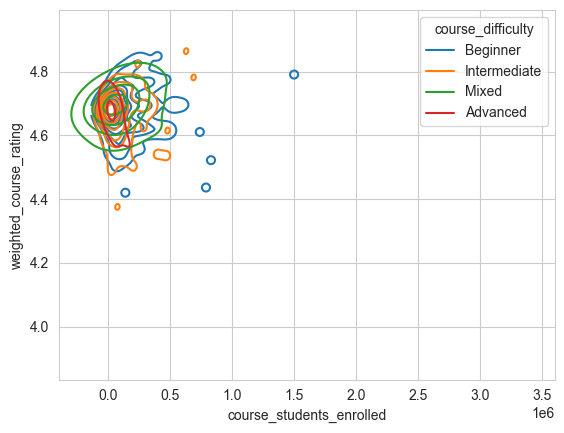

In [262]:
sns.kdeplot(
    x=df["course_students_enrolled"],
    y=df["weighted_course_rating"],
    hue=df["course_difficulty"],
)

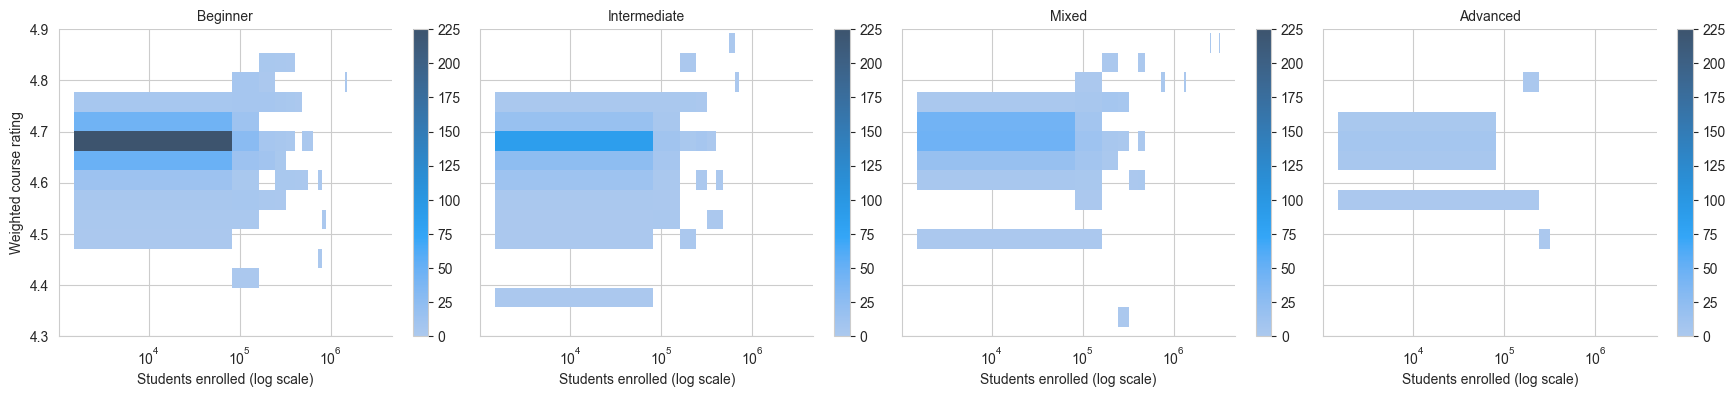

In [263]:
g = sns.displot(
    data=df,
    col="course_difficulty",
    x="course_students_enrolled",
    y="weighted_course_rating",
    kind="hist",
    bins=(40, 25),
    cbar=True,
    height=4,
    aspect=1.1,
)
for ax in g.axes.flat:
    ax.set_xscale("log")
    ax.set_ylim(4.3, 4.9)
g.set_axis_labels("Students enrolled (log scale)", "Weighted course rating")
g.set_titles(col_template="{col_name}")

In short, no we can't see any clear patterns suggesting higher enrolment of a course is neccesarily an indication of higher rating.